# Λογιστική Παλινδρόμηση

---

> Πάνος Λουρίδας, Αναπληρωτής Καθηγητής <br />
> Τμήμα Διοικητικής Επιστήμης και Τεχνολογίας <br />
> Οικονομικό Πανεπιστήμιο Αθηνών <br />
> louridas@aueb.gr

In [1]:
%matplotlib inline

import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *

* Όταν η εξαρτημένη μεταβλητή είναι δίτιμη, δηλαδή παίρνει μόνο δύο διακριτές τιμές 0 και 1, δεν μπορούμε να χρησιμοποιήσουμε την παλινδρόμηση που έχουμε δει.

* Αυτό γιατί η παλινδρόμηση λειτουργεί με την προϋπόθεση ότι η εξαρτημένη μεταβλητή είναι συνεχής.

* Τότε χρησιμοποιούμε τη *λογιστική παλινδρόμηση* (logistic regression).

* Θα ξεκινήσουμε με ένα παράδειγμα από τη Wikipedia (https://en.wikipedia.org/wiki/Logistic_regression#Probability_of_passing_an_exam_versus_hours_of_study).

* Έστω ότι έχουμε δεδομένα για ένα σύνολο φοιτητών.

* Η ανεξάρτητη μεταβλτή (`hours`) είναι ο αριθμός των ωρών που έχει αφιερώσει ένας φοιτητής σε μελέτη για την εξέταση ενός μαθήματος.

* Η εξαρτημένη μεταβλητή (`passed`) δείχνει αν ο φοιτητής πέρασε ($1$) ή κόπηκε ($0$).

In [2]:
hours = [
    0.5, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 
    2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50,  
    4.00, 4.25, 4.50, 4.75, 5.00, 5.50
]

passed = [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1]

students = pd.DataFrame({'hours' : hours, 'passed': passed})
students.sample(5)

,hours,passed
17,4.75,1
19,5.50,1
16,4.50,1
9,2.50,0
6,1.75,1


* Αν κάνουμε ένα διάγραμμα, θα δούμε ότι δεν έχει νόημα να προσπαθήσουμε να βρούμε μια γραμμή που να ταιριάζει με τα δεδομένα.

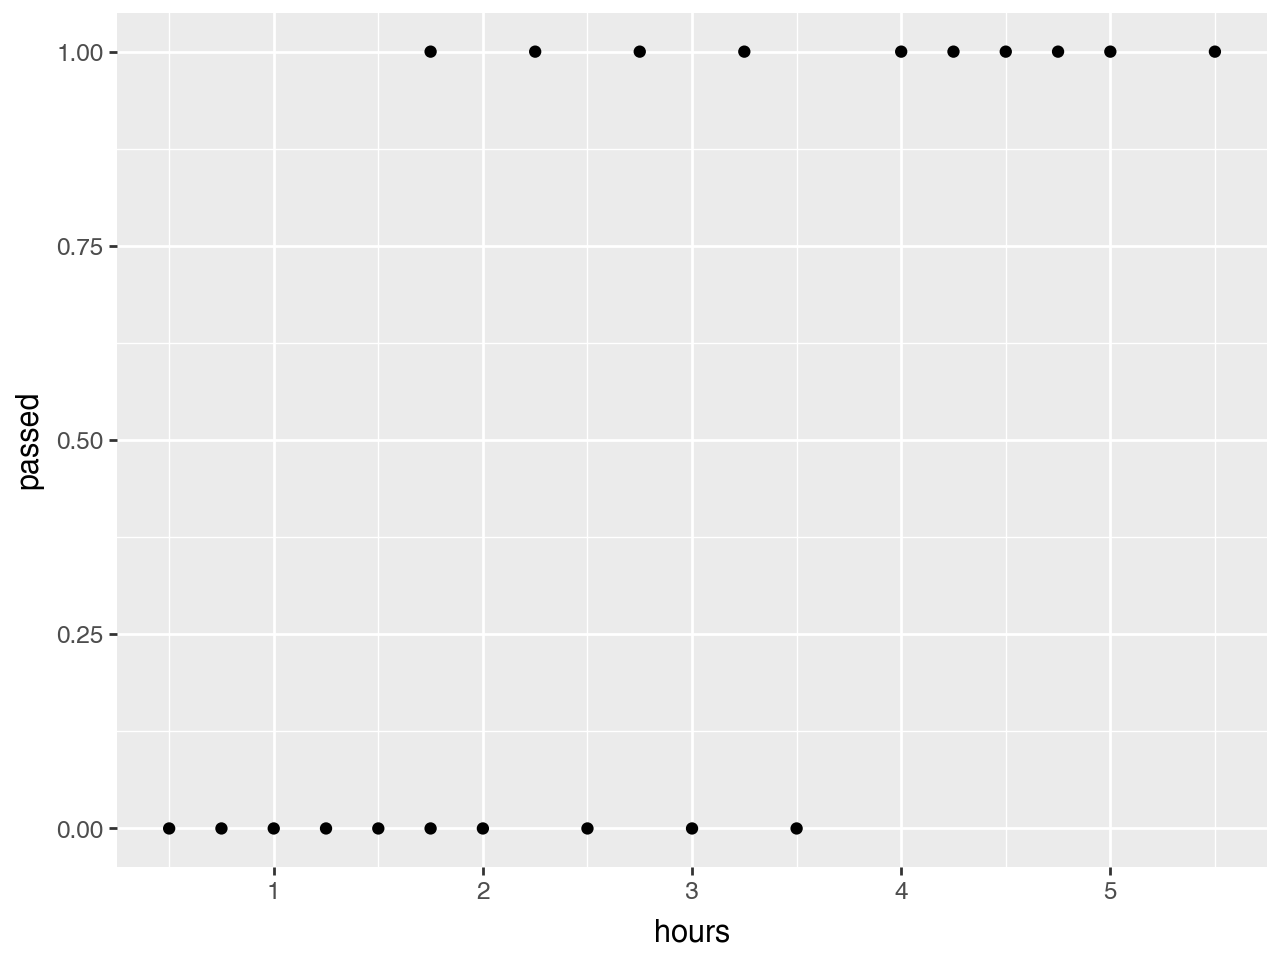

In [3]:
ggplot(data=students) + geom_point(aes(x='hours', y='passed'))

* Αν χρησιμοποιήσουμε γραμμική παλινδρόμηση, βρίσκουμε ένα μέτριο $R^2$, αλλά μία τεταγμένη που δεν είναι στατιστικά σημαντική.

In [4]:
students_mod = smf.ols("passed ~ hours", data=students)
students_res = students_mod.fit()
students_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 passed   R-squared:                       0.475
Model:                            OLS   Adj. R-squared:                  0.446
Method:                 Least Squares   F-statistic:                     16.29
Date:                Wed, 16 Jul 2025   Prob (F-statistic):           0.000775
Time:                        22:51:07   Log-Likelihood:                -8.0712
No. Observations:                  20   AIC:                             20.14
Df Residuals:                      18   BIC:                             22.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.1539      0.183     -0.840      0.412      -0.539       0.231
hours          0.2346      0.058      4.036      0.001       0.112       0.357
==============================================================================
Omnibus:                        0.367   Durbin-Watson:                   3.416
Prob(Omnibus):                  0.832   Jarque-Bera (JB):                0.381
Skew:                           0.270   Prob(JB):                        0.827
Kurtosis:                       2.594   Cond. No.                         7.30
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* Φτιάχνοντας ένα διάγραμμα με τα αποτελέσματα της παλινδρόμησης, μπορούμε να καταλάβουμε πού είναι το πρόβλημα.

* Η μεταβλητή `passed` είναι δίτιμη, αλλά εμείς την χειριζόμαστε ως συνεχή.

* Έτσι η γραμμή της παλινδρόμησης μας λέει πράγματα όπως «ο φοιτητής που μελέτησε 3 ώρες έχει περάσει περίπου 0,50».

* Αλλά είτε περνάς το μάθημα είτε όχι, δεν υπάρχει «έχει περάσει περίπου 0,50».

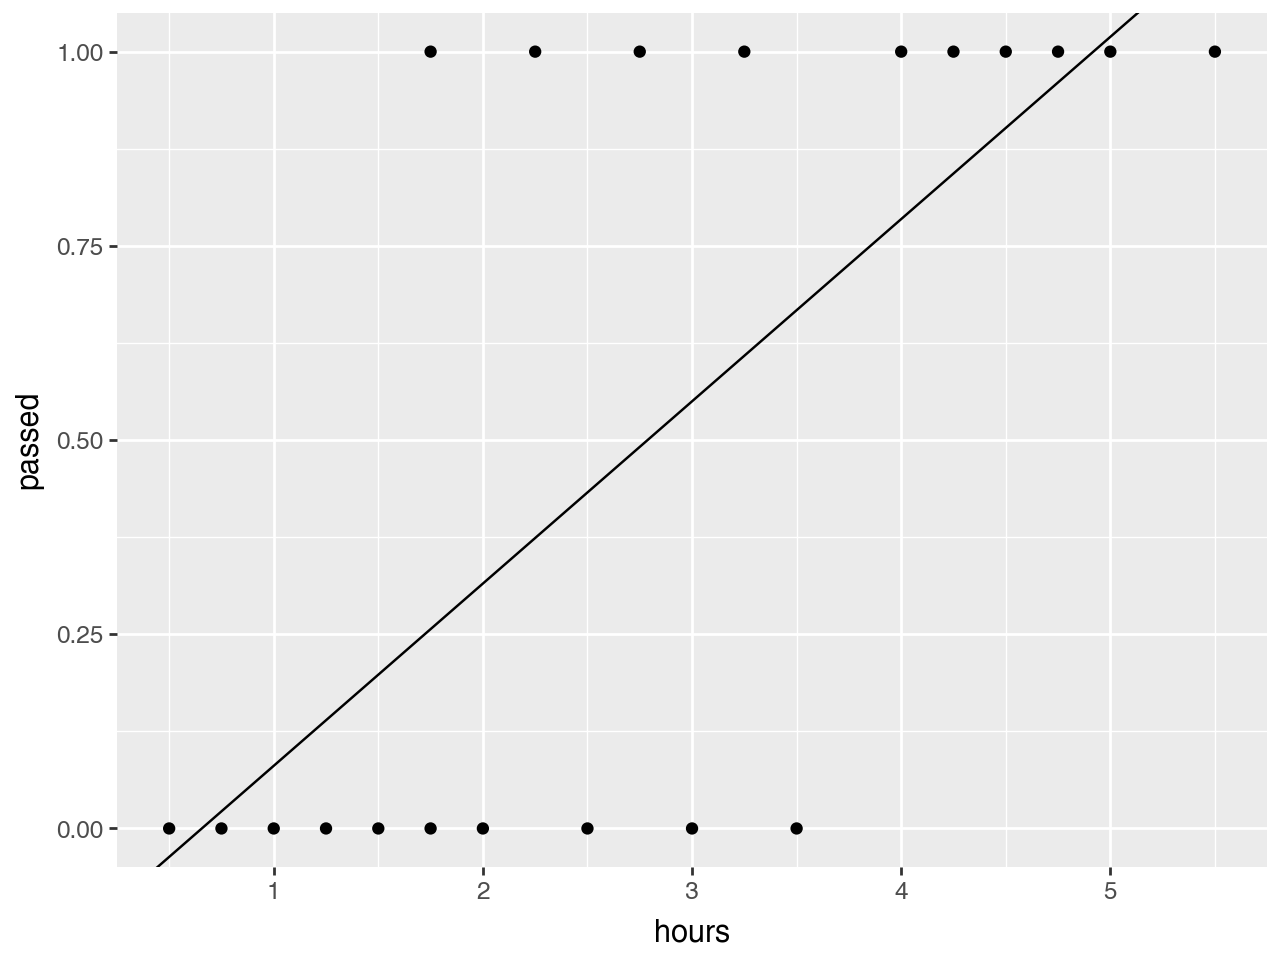

In [5]:
ggplot(data=students) +\
    geom_point(aes(x='hours', y='passed')) +\
    geom_abline(intercept=students_res.params['Intercept'],
               slope=students_res.params['hours'])

* Για να ξεπεράσουμε το πρόβλημα, αντί να προσπαθούμε να προβλέψουμε τη μεταβλητή `passed` θα στρέψουμε την προσοχή μας στην πιθανότητα επιτυχίας στην εξέταση με $x$ ώρες μελέτης.

* Η πιθανότητα επιτυχίας στην εξέταση με $x$ ώρες μελέτης είναι $p(x)$. 

* Ο λόγος 

  $$\frac{p(x)}{1 - p(x)}$$ 
  
  στα αγγλικά ονομάζεται *odds ratio* και στα ελληνικά έχει αποδωθεί με διάφορους όρους. Εμείς θα χρησιμοποιήσουμε τον όρο *σχετική πιθανότητα*.

* Αν πάρουμε το λογάριθμο της σχετικής πιθανότητας φτάνουμε στον λεγόμενο *λογιστικό μετασχηματισμό* (logit, logistic transformation):

$$ \mathrm{logit}(p(x)) = \ln\frac{p(x)}{1 - p(x)} $$

* Θέλουμε τότε να βρούμε τις παραμέτρους του μοντέλου:

  $$ y = \alpha + \beta x,\quad y = \ln\frac{p(x)}{1 - p(x)} $$

  δηλαδή:
  
    $$ \mathrm{logit}(p(x)) = \ln\frac{p(x)}{1 - p(x)} = \alpha + \beta x $$

* Γιατί αλήθεια να το κάνουμε αυτό;

* Διότι, αν επιλύσουμε την τελευταία εξίσωση ως προς το $p(x)$ παίρνουμε:

$$ p(x) = \frac {1}{1+e^{-(\alpha + \beta x)}} $$

* Αυτή η συνάρτηση μοιάζει με ένα S. Για το λόγο αυτό ονομάζεται *σιγμοειδής συνάρτηση*.

* Η συνάρτηση αυτή μπορεί να ταιριάζει (σίγουρα περισσότερο από την ευθεία) σε δεδομένα που παίρνουν δύο τιμές 0 και 1.

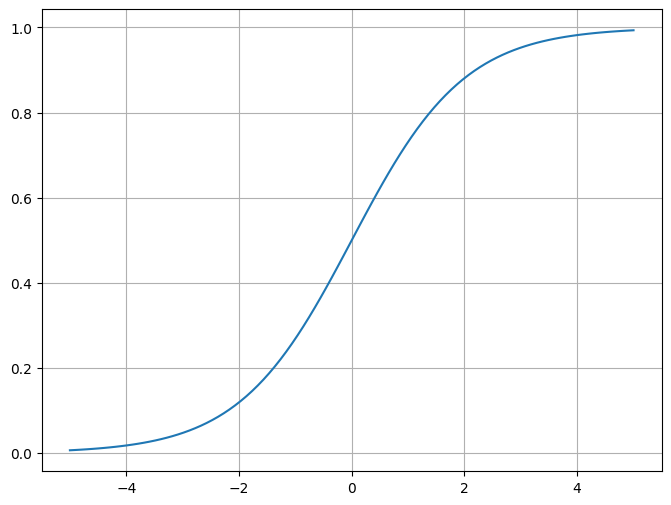

In [6]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
x = np.linspace(-5, 5,100)
y = 1 / (1 + np.exp(-x))
ax.plot(x, y)
ax.grid(True)

* Στα statsmodels χρησιμοποιούμε τη συνάρτηση `logit()` για να κάνουμε λογιστική παλινδρόμηση.

In [7]:
from statsmodels.formula.api import logit
students_logit_mod = logit("passed ~ hours", data=students)
students_logit_res = students_logit_mod.fit()

students_logit_res.summary()

Optimization terminated successfully.
         Current function value: 0.401494
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 passed   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                  0.4208
Time:                        22:51:07   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

* Για να πάρουμε τις προβλέψεις του μοντέλου:

In [8]:
passed_predicted = students_logit_res.predict(students['hours'])
passed_predicted

0     0.034710
1     0.049773
2     0.070892
3     0.100029
4     0.139344
5     0.190837
6     0.190837
7     0.255703
8     0.333530
9     0.421627
10    0.515011
11    0.607359
12    0.692617
13    0.766481
14    0.874448
15    0.910278
16    0.936624
17    0.955611
18    0.969097
19    0.985194
dtype: float64

* Αν τώρα φτιάξουμε ένα διάγραμμα με τις προβλέψεις και τα δεδομένα, θα δούμε πράγματι τη σιγμοειδή συνάρτηση να τα προσεγγίζει.

* Προσέξτε ότι στον άξονα $y$ δεν έχουμε μια δίτιμη μεταβλητή, αλλά μια συνεχή μεταβλητή, την πιθανότητα επιτυχίας στην εξέταση.

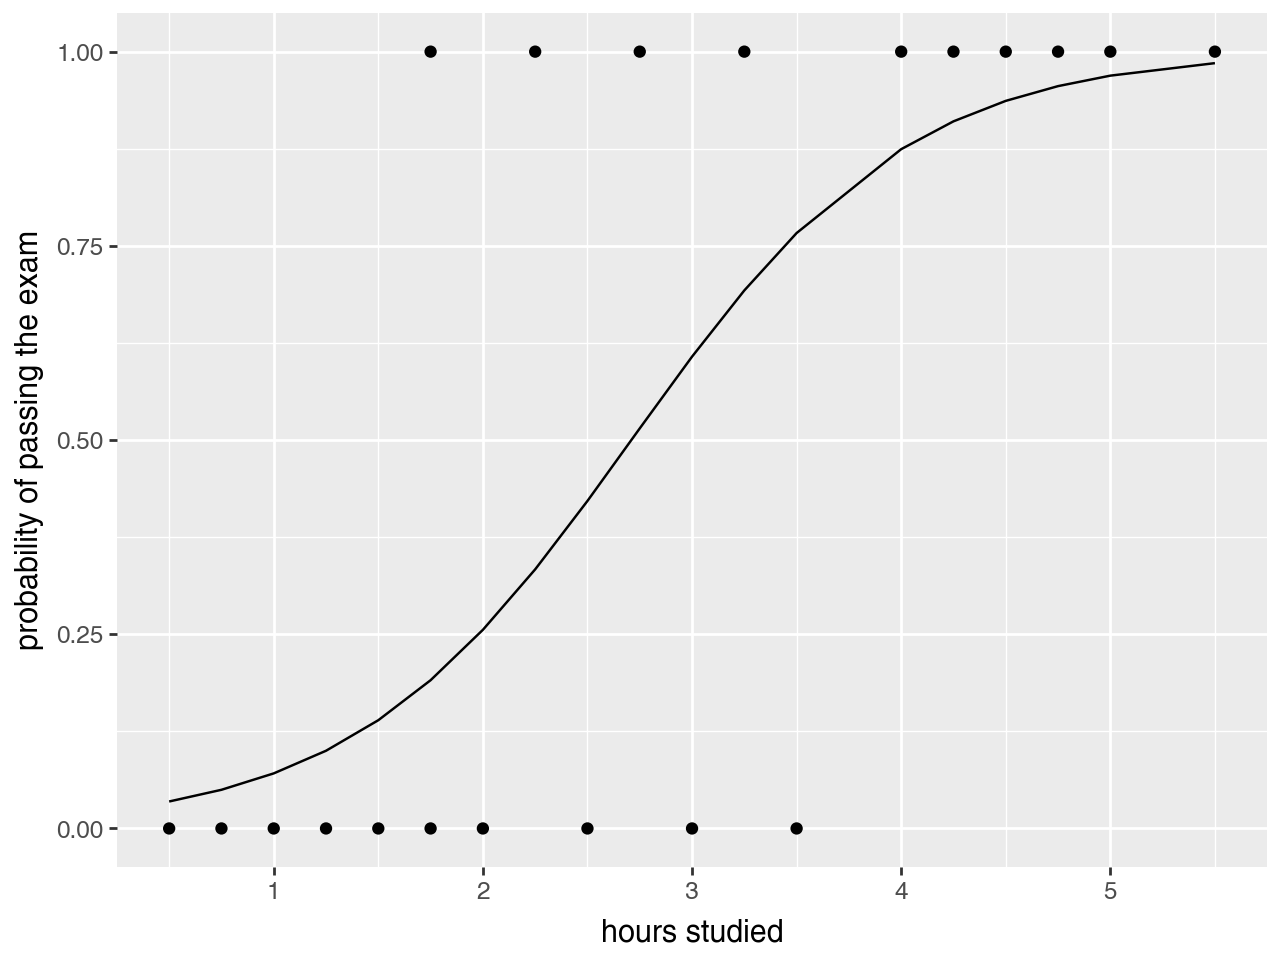

In [9]:
ggplot(data=students) +\
    geom_point(aes(x='hours', y='passed')) +\
    geom_line(aes(x='hours'), y=passed_predicted) +\
    labs(y='probability of passing the exam', x='hours studied')

* Για να καταλάβουμε τι ακριβώς σημαίνει το μοντέλο που βρήκαμε, ας επιστρέψουμε στη σύνοψη των αποτελεσμάτων.

In [10]:
students_logit_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 passed   No. Observations:                   20
Model:                          Logit   Df Residuals:                       18
Method:                           MLE   Df Model:                            1
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                  0.4208
Time:                        22:51:07   Log-Likelihood:                -8.0299
converged:                       True   LL-Null:                       -13.863
Covariance Type:            nonrobust   LLR p-value:                 0.0006365
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.0777      1.761     -2.316      0.021      -7.529      -0.626
hours          1.5046      0.629      2.393      0.017       0.272       2.737
==============================================================================
"""

* Η λογιστική παλινδρόμηση δεν λειτουργεί με την μέθοδο των ελαχίστων τετραγώνων, αλλά με τη μέθοδο της *μέγιστης πιθανοφάνειας* (maximum likelihood).

* Γι' αυτό δεν υπάρχει $R^2$.

* Υπάρχει ένα ψεύδο-$R^2$, το οποίο ονομάζεται McFadden ψεύδο-$R^2$ του McFadden (McFadden's pseudo-$R^2$).

* To ψεύδο-$R^2$ μπορεί να έχει πολύ χαμηλότερες τιμές από ότι το $R^2$: τιμές από $0{,}2$ έως $0{,}4$ μπορεί να αντιστοιχούν σε ένα πολύ καλό μοντέλο.

* Τα Log-Likelihood, LL-Null, LLR p-value είναι επίσης μετρικές που μας βοηθούν στην αποτίμηση του μοντέλου.

* Τα αποτελέσματα δείχνουν ότι η μελέτη σχετίζεται με την επιτυχία στην εξέταση.

* Ο λογάριθμος των σχετικών πιθανοτήτων είναι:

$$ \ln{\frac{p(x)}{1 - p(x)}} = -4{,}0777 + 1{,}5046 x $$

* Με μηδενικό διάβασμα, ο λογάριθμος των σχετικών πιθανοτήτων είναι ίσος με $-4{,}0777$.

* Μια επιπλέον ώρα μελέτης αυξάνει το λογάριθμο των σχετικών πιθανοτήτων κατά $1{,}5046$.

* Αν βγάλουμε τον λογάριθμο παίρνουμε:

$$ \frac{p(x)}{1 - p(x)} = \exp{(-4{,}0777 + 1{,}5046 x)} = e^{(-4{,}0777 + 1{,}5046 x)}$$

* Άρα μια επιπλέον ώρα μελέτη πολλαπλασιάζει τις σχετικές πιθανότητες επιτυχίας επί $e^{1{,}5046} \approx 4{,}5$.

* Με μηδενικό διάβασμα, οι σχετικές πιθανότητες επιτυχίας είναι $e^{-4{,}0777} \approx 0{,}017 = 1{,}7\%$.

* Λύνοντας ως προς $p(x)$ έχουμε:

$$ p(x) = \frac{1}{1 + e^{(4{,}0777 - 1{,}5046x)}} $$

* Έτσι, μπορούμε να υπολογίσουμε την πιθανότητα επιτυχίας για διαφορετικές ώρες μελέτης.

* Φαίνεται ότι η μελέτη αποδίδει!

In [11]:
study_hours = np.arange(1, 6)
intercept = students_logit_res.params['Intercept']
hours_coeff = students_logit_res.params['hours']
probability_passing = 1 / (1 + np.exp(-(intercept + hours_coeff*study_hours)))
print('study hours', study_hours)
print('probability of passing', probability_passing)

study hours [1 2 3 4 5]
probability of passing [0.07089196 0.25570318 0.60735865 0.8744475  0.96909707]


* Αν έχουμε περισσότερες από μία ανεξάρτητες μεταβλητές, μπορούμε να εφαρμόσουμε πολλαπλή λογιστική παλινδρόμηση.

* Θα χρησιμοποιήσουμε δεδομένα από μία έρευνα που έγινε το 1974 σχετικά με εξωσυζυγικές σχέσεις στις ΗΠΑ.

In [12]:
print(sm.datasets.fair.SOURCE)


Fair, Ray. 1978. "A Theory of Extramarital Affairs," `Journal of Political
Economy`, February, 45-61.

The data is available at http://fairmodel.econ.yale.edu/rayfair/pdf/2011b.htm



In [13]:
print(sm.datasets.fair.NOTE[8:]) # get rid of empty lines

Number of observations: 6366
    Number of variables: 9
    Variable name definitions:

        rate_marriage   : How rate marriage, 1 = very poor, 2 = poor, 3 = fair,
                        4 = good, 5 = very good
        age             : Age
        yrs_married     : No. years married. Interval approximations. See
                        original paper for detailed explanation.
        children        : No. children
        religious       : How relgious, 1 = not, 2 = mildly, 3 = fairly,
                        4 = strongly
        educ            : Level of education, 9 = grade school, 12 = high
                        school, 14 = some college, 16 = college graduate,
                        17 = some graduate school, 20 = advanced degree
        occupation      : 1 = student, 2 = farming, agriculture; semi-skilled,
                        or unskilled worker; 3 = white-colloar; 4 = teacher
                        counselor social worker, nurse; artist, writers;
                  

* Θα διαβάσουμε τα δεδομένα και θα δημιουργήσουμε μια νέα δίτιμη μεταβλητή `affair` που θα δείχνει αν υπάρχει εξωσυζυγική σχέση ή όχι.

* Συγκεκριμένα, αν υπάρχει η τιμή της `affair` θα είναι 1, αλλιώς θα είναι 0.

In [14]:
affair_df = sm.datasets.fair.load_pandas().data

affair_df['affair'] = (affair_df['affairs'] > 0).astype(float)
affair_df.sort_values(by='affair', inplace=True)
affair_df.reset_index(inplace=True, drop=True)
affair_df.sample(10)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
4308,5.0,42.0,23.0,3.0,4.0,12.0,3.0,3.0,0.000000,0.0
3838,4.0,27.0,6.0,1.0,2.0,14.0,3.0,3.0,0.000000,0.0
701,4.0,32.0,16.5,4.0,2.0,16.0,5.0,6.0,0.000000,0.0
3850,5.0,32.0,2.5,4.0,3.0,16.0,5.0,4.0,0.000000,0.0
5954,5.0,22.0,2.5,0.0,1.0,14.0,3.0,2.0,1.400000,1.0
2175,4.0,37.0,16.5,4.0,2.0,12.0,3.0,2.0,0.000000,0.0
1382,4.0,22.0,6.0,0.0,3.0,16.0,3.0,2.0,0.000000,0.0
5152,5.0,37.0,16.5,2.0,3.0,12.0,3.0,2.0,0.727273,1.0
1348,4.0,32.0,13.0,2.0,1.0,16.0,4.0,4.0,0.000000,0.0
1759,5.0,22.0,2.5,1.0,1.0,12.0,3.0,2.0,0.000000,0.0


* Πριν προχωρήσουμε, ας πάρουμε μια γενική εικόνα.

* Ποια είναι η πιθανότητα συνολικά να υπάρχει εξωσυζυγική σχέση;

In [15]:
print(f"{affair_df['affair'].sum() / affair_df['affair'].count()}")

0.3224945020420987


* Αλλά θέλουμε να εμβαθύνουμε. 

* Για το σκοπό αυτό θα κάνουμε λογιστική παλινδρόμηση.

* Η εξαρτημένη μεταβλητή θα είναι η στήλη `affair` που δημιουργήσαμε.

In [16]:
affair_mod = logit("affair ~ occupation + educ + occupation_husb"
                   " + rate_marriage + age + yrs_married + children"
                   " + religious", affair_df).fit()

affair_mod.summary()

Optimization terminated successfully.
         Current function value: 0.545314
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 affair   No. Observations:                 6366
Model:                          Logit   Df Residuals:                     6357
Method:                           MLE   Df Model:                            8
Date:                Wed, 16 Jul 2025   Pseudo R-squ.:                  0.1327
Time:                        22:51:08   Log-Likelihood:                -3471.5
converged:                       True   LL-Null:                       -4002.5
Covariance Type:            nonrobust   LLR p-value:                5.807e-224
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           3.7257      0.299     12.470      0.000       3.140       4.311
occupation          0.1602      0.034      4.717      0.000       0.094       0.227
educ               -0.0392      0.015     -2.533      0.011      -0.070      -0.009
occupation_husb     0.0124      0.023      0.541      0.589      -0.033       0.057
rate_marriage      -0.7161      0.031    -22.784      0.000      -0.778      -0.655
age                -0.0605      0.010     -5.885      0.000      -0.081      -0.040
yrs_married         0.1100      0.011     10.054      0.000       0.089       0.131
children           -0.0042      0.032     -0.134      0.893      -0.066       0.058
religious          -0.3752      0.035    -10.792      0.000      -0.443      -0.307
===================================================================================
"""

* Μιας μονάδας αύξηση στο είδος της απασχόλησης αυξάνει κατά $0{,}1602$ το λογάριθμο της σχετικής πιθανότητας να υπάρχει εξωσυζυγική σχέση.

* Ισοδύναμα, η σχετική πιθανότητα αυξάνεται κατά $e^{0{,}1602} \approx 1{,}1737$ ή περίπου $17\%$.

In [17]:
print(affair_mod.params['occupation'])

0.1602338331908111


* Ένα επιπλέον έτος γάμου αυξάνει κατά $0{,}11$ το λογάριθμο της σχετικής πιθανότητας να υπάρχει εξωσυζυγική σχέση.

* Ισοδύναμα, η σχετική πιθανότητα αυξάνεται κατά $e^{0{,}11} \approx 1{,}12 $ ή περίπου $12\%$.

In [18]:
print(affair_mod.params['yrs_married'])

0.11001794098250867


* Μιας μονάδας αύξηση στην αξιολόγηση του γάμου μειώνει κατά $0{,}7161$ το λογάριθμο της σχετικής πιθανότητας να υπάρχει εξωσυζυγική σχέση.

* Ισοδύναμα, αφού $e^{-0{,}7161} \approx 0{,}4886$, η σχετική πιθανότητα να υπάρχει εξωσυζυγική σχέση μειώνεται κατά περίπου $100 - 0{,}4886 \approx 51\%$.

In [19]:
print(affair_mod.params['rate_marriage'])

-0.716107105080227


* Μιας μονάδας αύξηση στη θρησκευτικότητα μειώνει κατά $0{,}3752$ το λογάριθμο της σχετικής πιθανότητας να υπάρχει εξωσυζυγική σχέση.

* Ισοδύναμα, αφού $e^{-0{,}3752} \approx 0{,}6872$, η σχετική πιθανότητα να υπάρχει εξωσυζυγική σχέση μειώνεται κατά περίπου $100 - 68{,}72 \approx 31\%$.

In [20]:
print(affair_mod.params['religious'])

-0.37515765268394025


* Για περισσότερες πληροφορίες για τη λογιστική παλινδρόμηση και την ερμηνεία της, δείτε το άρθρο του Sandro Sperandei [Understanding logistic regression analysis](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3936971/).